In [1]:
# Import packages
import scanpy as sc
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

## Add cell type labels

In [2]:
norm_qc_adata = sc.read_h5ad('../../../../data/processed/data_for_evaluating_cell_type_annotation/Zheng68k.h5ad')

In [3]:
norm_qc_adata

AnnData object with n_obs × n_vars = 68579 × 14066
    obs: 'barcodes', 'cell_type', 'patientID', 'n_counts', 'log_n_counts', 'n_genes', 'log_n_genes', 'pct_counts_in_top_20_genes', 'mt_frac', 'ribo_frac', 'hem_frac', 'size_factors'
    var: 'gene_ENSG', 'n_cells'
    layers: 'log1p_counts'

In [4]:
del norm_qc_adata.layers["log1p_counts"]

## Visualize

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


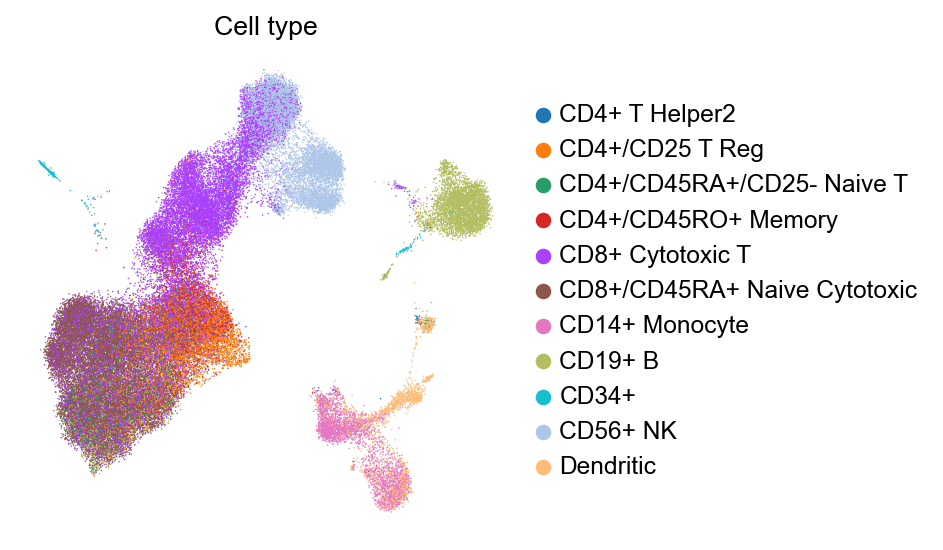

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


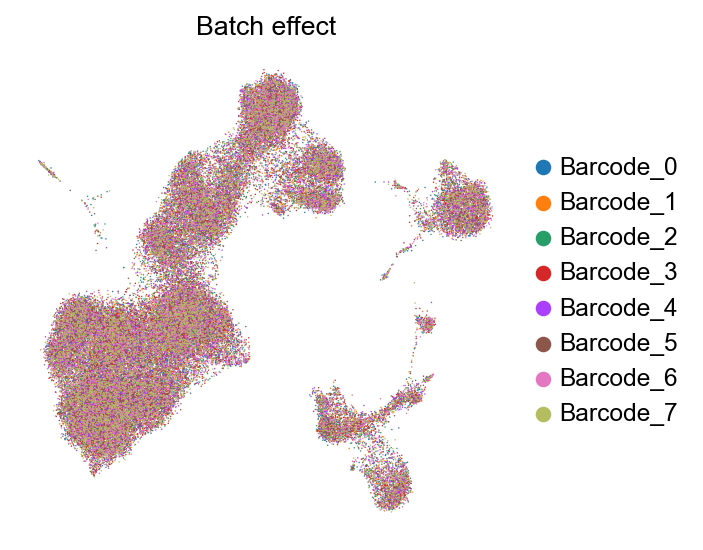

In [8]:
sc.settings.set_figure_params(dpi_save=600,  frameon=False, transparent=True, fontsize=12)

vis_adata = norm_qc_adata

vis_adata.obs["patientID"] = vis_adata.obs["patientID"].astype(str)
for i, patient_id in enumerate(vis_adata.obs["patientID"].unique()):
    vis_adata.obs.loc[vis_adata.obs["patientID"] == patient_id, "patientID"] = f"Barcode_{i}"

sc.pp.highly_variable_genes(vis_adata, n_top_genes=4000, flavor="cell_ranger")

sc.pp.pca(vis_adata, n_comps=40, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(vis_adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(vis_adata)
#sc.pl.umap(vis_adata, color='cell_type', title='')
sc.pl.umap(vis_adata, color='cell_type', ncols=1, title="Cell type", show=True, save=f"Zheng68k_pca_cell_type.svg")
sc.pl.umap(vis_adata, color="patientID", ncols=1, title="Batch effect", show=True, save=f"Zheng68k_pca_batch_effect.svg")